In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Precipitation Analysis

# Design a query to retrieve the last 12 months of precipitation data.

# Select only the date and prcp values.

# Load the query results into a Pandas DataFrame and set the index to the date column.

# Sort the DataFrame values by date.

# Plot the results using the DataFrame plot method.

In [16]:
#First issue is that to figure out the last 12 months of data by finding the last date and going back 365 days worth
last_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()[0]
print(type(last_date))#This is a string and note a datetime
#strptime means string parser, this will convert a string format to datetime
prev_year_dt = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
print(type(prev_year_dt))#It is a datetime class which is what we want for further manipulation
print(prev_year_dt)

<class 'str'>
<class 'datetime.datetime'>
2016-08-23 00:00:00


In [17]:
prev_year_dt

datetime.datetime(2016, 8, 23, 0, 0)

<class 'list'>


Text(0, 0.5, 'Precipitation in Inches')

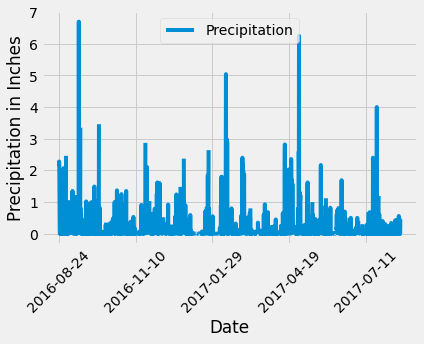

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
prev_year_dt
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prev_year_dt).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
print(type(results)) # List of lists
df = pd.DataFrame(results,columns=['Date','Precipitation'])
# Sort the dataframe by date
df = df.sort_values(by=['Date'], ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation', rot=45)
plt.xlabel('Date')
plt.ylabel('Precipitation in Inches')

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()[0]

(9)

In [22]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).all()

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(most_active_stations)
most_active_station = most_active_stations[0][0]
print(most_active_station)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
USC00519281


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()# lowest 
print(lowest)

highest = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()# lowest 
print(highest)

average = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()# lowest 
print(average)

#Or the more slick way of 
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, -1.340000000000014, 'Temperature')

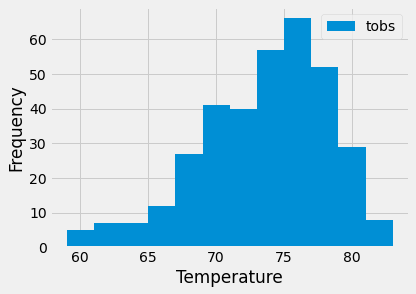

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= prev_year_dt).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

In [27]:
session.close()# Do not forget to do this when done querying

## Bonus Challenge Assignment

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [48]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

prev_year_start = dt.date(2017, 1, 1) - dt.timedelta(days=365)
prev_year_end = dt.date(2018, 1, 1) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(f"The minimum temperature was: {tmin:.2f} \n\
The average temperature was: {tavg:.2f} \n\
The maximum temperature was: {tmax:.2f}")

The minimum temperature was: 56.00 
The average temperature was: 74.15 
The maximum temperature was: 84.00


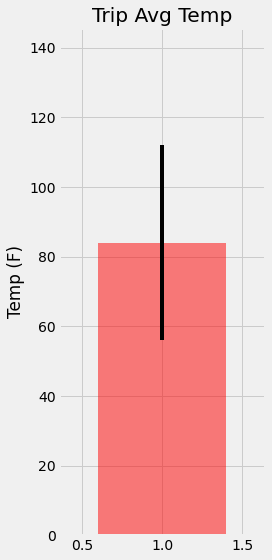

In [78]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
bar = ax.bar(1, tmax, yerr=tmax-tmin, alpha=0.5, color='red', align='center')
ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temp (F)')
ax.margins(0.3,0.3)
#ax.set_aspect(2.)# Does not work for some reason
fig.tight_layout()

In [93]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = '2017-01-01'
end_date = '2018-01-01'

sel = [Station.station, Station.name, Station.latitude,
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

results = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date <=end_date).\
    filter(Measurement.date >=start_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
    


for item in results:
    print(item)

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 68.78000000000003)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 43.66000000000002)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 34.62000000000001)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 27.319999999999993)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 21.80000000000002)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 10.659999999999993)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 3.39)


In [94]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [108]:
# Plot the daily normals as an area plot with `stacked=False`
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Use the start and end date to create a range of dates
trip_dates = pd.date_range(start_date, end_date, freq='D')# list of timestampes
#print(trip_dates)
# Stip off the year and save a list of %m-%d strings
trip_month_day = trip_dates.strftime('%m-%d')# list of strings that look like timestamps
#print(type(trip_month_day))
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_month_day:
    normals.append(*daily_normals(date))
    
normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0),
 (57.0, 67.16071428571429, 75.0),
 (58.0, 67.9298245614035, 78.0),
 (62.0, 69.74137931034483, 77.0),
 (57.0, 67.3103448275862, 78.0),
 (57.0, 67.4074074074074, 81.0),
 (57.0, 67.25454545454545, 77.0),
 (58.0, 69.52631578947368, 77.0),
 (56.0, 69.31372549019608, 78.0),
 (54.0, 68.62962962962963, 80.0),
 (61.0, 69.07407407407408, 76.0),
 (57.0, 68.63157894736842, 77.0),
 (60.0, 68.26315789473684, 78.0),
 (61.0, 68.86666666666666, 78.0),
 (61.0, 70.14545454545454, 76.0),
 (60.0, 69.26415094339623, 76.0),
 (57.0, 69.50909090909092, 79.0),
 (58.0, 68.76271186440678, 78.0),
 (61.0, 67.94915254237289, 75.0),
 (61.0, 70.58620689655173, 77.0),
 (59.0, 68.56896551724138, 75.0),
 (62.0, 69.03703703703704, 77.0),
 (64.0, 69.14, 76.0),
 (60.0, 67.12962962962963, 77.0),
 (60.0, 6

In [109]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
df['date'] = trip_dates# Create a new column with dates
df.set_index(['date'],inplace=True)# make that new column the new index instead of index numbers
df.head()

,tmin,tavg,tmax
date,,,
2017-01-01,62.0,69.153846,77.0
2017-01-02,60.0,69.396226,77.0
2017-01-03,62.0,68.909091,77.0
2017-01-04,58.0,70.000000,76.0
2017-01-05,56.0,67.964286,76.0


Text(9.310000000000002, 0.5, 'Temperature [F]')

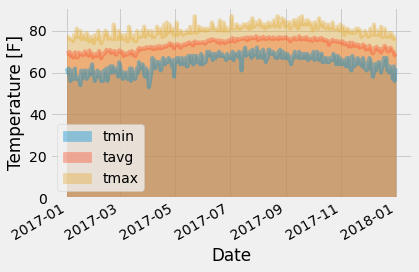

In [116]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot(kind='area', stacked=False, x_compat=True, alpha=.4)
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Temperature [F]")